# MNIST Handwritten Digit Recognition using Densely Connected  Neural Network

In [1]:
# Imports required packages

from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loads training and testing data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Checks for data shape

print("Train data shape:", x_train.shape,
      "\nTest data shape:", x_test.shape)

Train data shape: (60000, 28, 28) 
Test data shape: (10000, 28, 28)


In [4]:
# Prepares training, validation and test data

x_train = x_train.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255
y_train = to_categorical(y_train)

x_test = x_test.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255
y_test = to_categorical(y_test)

# Splits training data further into training and validation data sets
x_val = x_train[50000:]
x_train = x_train[:50000]

y_val = y_train[50000:]
y_train = y_train[:50000]

In [5]:
# Creates the densed neural network model

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=((28*28),)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Trains the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 5s 12ms/step - loss: 0.4635 - accuracy: 0.8615 - val_loss: 0.1338 - val_accuracy: 0.9617
Epoch 2/5
391/391 [==============================] - 4s 10ms/step - loss: 0.1201 - accuracy: 0.9644 - val_loss: 0.1040 - val_accuracy: 0.9708
Epoch 3/5
391/391 [==============================] - 4s 11ms/step - loss: 0.0754 - accuracy: 0.9777 - val_loss: 0.0877 - val_accuracy: 0.9750
Epoch 4/5
391/391 [==============================] - 4s 11ms/step - loss: 0.0522 - accuracy: 0.9844 - val_loss: 0.0763 - val_accuracy: 0.9778
Epoch 5/5
391/391 [==============================] - 5s 12ms/step - loss: 0.0389 - accuracy: 0.9888 - val_loss: 0.0783 - val_accuracy: 0.9781


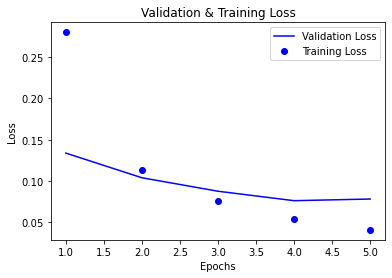

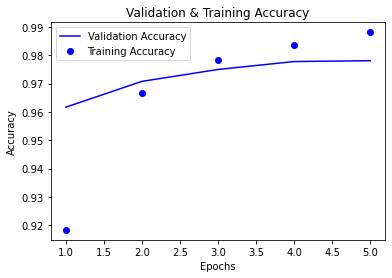

In [7]:
# Evaluates the training and validation performance

history_dict = history.history

epochs = range(1, len(history_dict["accuracy"]) + 1)

val_loss = history_dict["val_loss"]
train_loss = history_dict["loss"]

val_accuracy = history_dict["val_accuracy"]
train_accuracy = history_dict["accuracy"]

plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.plot(epochs, train_loss, "bo", label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation & Training Loss")
plt.show()

plt.plot(epochs, val_accuracy, "b", label = "Validation Accuracy")
plt.plot(epochs, train_accuracy, "bo", label = "Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation & Training Accuracy")
plt.show()

In [8]:
# Combines back both training and validation data, and retrains the final model

x_train = np.append(x_train, x_val, axis=0)
y_train = np.append(y_train, y_val, axis=0)

model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0387 - accuracy: 0.9887
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0284 - accuracy: 0.9918
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0219 - accuracy: 0.9937
Epoch 4/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0171 - accuracy: 0.9950
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0131 - accuracy: 0.9962


In [9]:
# Evaluates the model against test data

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Testing Loss: ", test_loss, ", Testing Accuracy: ", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0715 - accuracy: 0.9808
Testing Loss:  0.07152192294597626 , Testing Accuracy:  0.9807999730110168
